# ProjetML - Experimentation

In [1]:
%load_ext autoreload
%autoreload 2
from classes import *
from loss import *
from mltools import *
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix
import pandas as pd

### Data 

In [2]:
############################ USPS DATA ######################################
uspsdatatrain = "./data/USPS_train.txt"
uspsdatatest = "./data/USPS_test.txt"
X_train_usps,Y_train_usps = load_usps(uspsdatatrain)
X_test_usps,Y_test_usps = load_usps(uspsdatatest)

In [3]:
############################ MNIST DATA ######################################
from keras.datasets import mnist
(mnist_train_X, mnist_train_y), (mnist_test_X, mnist_test_y) = mnist.load_data()
mnist_train_X = mnist_train_X.reshape(60000, 784)
mnist_test_X = mnist_test_X.reshape(10000, 784)
mnist_train_X = mnist_train_X.astype('float32')
mnist_test_X = mnist_test_X.astype('float32')

In [4]:
############################ 2 GAUSIENNES DATA ######################################
artix2, artiy2 = gen_arti(data_type=0, nbex=10000)
artiy2 = np.where(artiy2 == -1, 0, 1)

artix2_train, artiy2_train, artix2_test, artiy2_test = [], [], [] ,[]

part = 5 #1/part of the data for test

for i in range(len(artix2)):
    if i%part == 0:
        artix2_test.append(artix2[i])
        artiy2_test.append(artiy2[i])
    artix2_train.append(artix2[i])
    artiy2_train.append(artiy2[i])

artix2_train, artiy2_train, artix2_test, artiy2_test = np.array(artix2_train), np.array(artiy2_train),\
                                                   np.array(artix2_test), np.array(artiy2_test)

In [5]:
############################ 4 GAUSIENNES DATA ######################################
artix4, artiy4 = gen_arti(data_type=1, nbex=10000)
artiy4 = np.where(artiy4 == -1, 0, 1)

artix4_train, artiy4_train, artix4_test, artiy4_test = [], [], [] ,[]

part = 5 #1/part of the data for test

for i in range(len(artix4)):
    if i%part == 0:
        artix4_test.append(artix4[i])
        artiy4_test.append(artiy4[i])
    artix4_train.append(artix4[i])
    artiy4_train.append(artiy4[i])

artix4_train, artiy4_train, artix4_test, artiy4_test = np.array(artix4_train), np.array(artiy4_train),\
                                                   np.array(artix4_test), np.array(artiy4_test)

In [6]:
############################ RANDOM DATA ######################################
trainx = np.random.random((500,2))
trainy = np.where(np.random.random((500,1)) > 0.5, 1, 0)

In [7]:
############################ REGRESSION DATA ######################################
regressionX, regressionY = datasets.make_regression(n_samples=500,
                                      n_features=1,
                                      n_informative=1,
                                      noise=10, random_state=0)
regressionY = np.reshape(regressionY, (len(regressionY), 1))

## Lineaire

### Regression

In [8]:
mse = MSELoss()

l1 = Linear(1,1)
net = Sequential([l1])

In [9]:
all_loss = BatchGD(net, mse, regressionX, regressionY, epochs=7, eps=1e-3)

100%|██████████| 7/7 [00:00<00:00, 7020.59it/s]


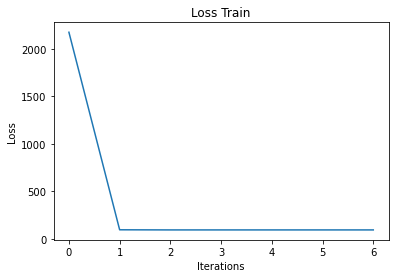

In [10]:
plt.figure()
plt.plot(all_loss)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Train')
plt.show()

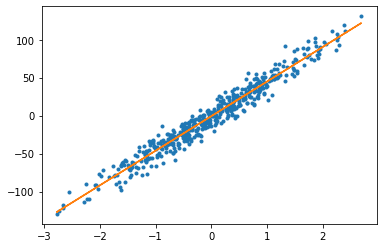

In [11]:
plt.figure()
plt.plot(regressionX, regressionY, '.')
plt.plot(regressionX, regressionX*l1._parameters + l1._biais)
plt.show()

### Classification

In [12]:
l2 = Linear(artix2_train.shape[1], 1)
netClassif = Sequential([l2])

In [13]:
all_loss = BatchGD(netClassif, mse, artix2_train, artiy2_train, epochs=15, eps=1e-5)

100%|██████████| 15/15 [00:00<00:00, 914.50it/s]


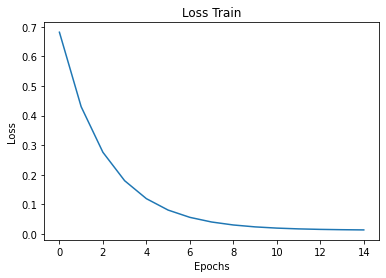

In [14]:
plt.figure()
plt.plot(all_loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Train')
plt.show()

### Function Accuracy & Prediction

In [15]:
# def predict_regression(X, seq):
#     return seq.forward(X)
# def predict_linear(X, seq):
#     res = seq.forward(X)
#     return np.where(res > 0.5, 1, 0)

# def accuracy_linear(seq, X, Y):
#     Yhat = predict_linear(X, seq)
#     return np.where(Yhat == Y, 1, 0).sum()/len(Y), Yhat

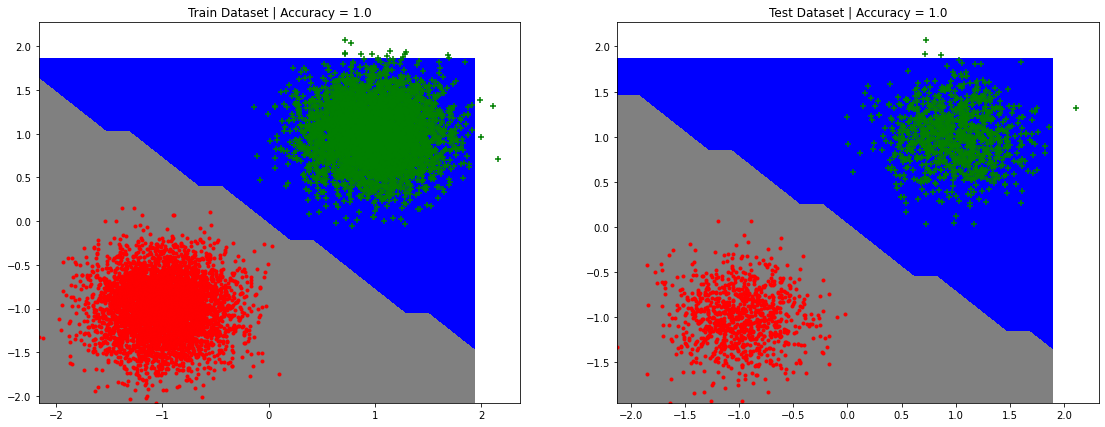

In [16]:
accuClassifLinearTrain, _ = accuracy_linear(netClassif, artix2_train, artiy2_train)
accuClassifLinearTest, _ = accuracy_linear(netClassif, artix2_test, artiy2_test)

plt.figure(figsize=(19,7))
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plot_frontiere(artix2_train, predict_linear, netClassif)
plot_data(artix2_train, artiy2_train)
plt.title(f'Train Dataset | Accuracy = {accuClassifLinearTrain}')
plt.subplot(1, 2, 2) # row 1, col 2 index 1
plot_frontiere(artix2_test, predict_linear, netClassif)
plot_data(artix2_test, artiy2_test)
plt.title(f'Test Dataset | Accuracy = {accuClassifLinearTest}')
plt.show()

## Non Lineaire

### Neural Networks

In [17]:
mse = MSELoss()

number_neurons = 4

seqNonLinearSansB = Sequential([Linear(len(artix4_train[0]),number_neurons, biais=False),TanH(),Linear(number_neurons,1, biais=False),Sigmoide()])
seqNonLinearAvecB = Sequential([Linear(len(artix4_train[0]),number_neurons, biais=True),TanH(),Linear(number_neurons,1, biais=True),Sigmoide()])

### Test

#### 4 Neurones

In [18]:
losses_train_BGDSansB = BatchGD(seqNonLinearSansB, mse, artix4_train, artiy4_train, epochs=20, eps=0.001)
losses_train_BGDAvecB = BatchGD(seqNonLinearAvecB, mse, artix4_train, artiy4_train, epochs=20, eps=0.001)

100%|██████████| 20/20 [00:00<00:00, 307.70it/s]


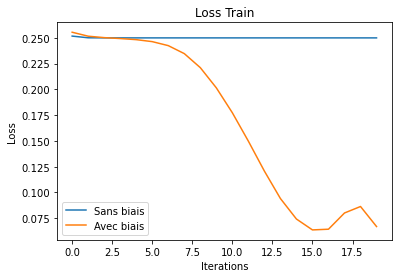

In [19]:
plt.figure()
plt.plot(losses_train_BGDSansB)
plt.plot(losses_train_BGDAvecB)
plt.legend(['Sans biais', 'Avec biais'])
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Train')
plt.show()

In [20]:
seqNonLinearSansB = Sequential([Linear(len(artix4_train[0]),number_neurons, biais=False),TanH(),Linear(number_neurons,1, biais=False),Sigmoide()])
seqNonLinearAvecB = Sequential([Linear(len(artix4_train[0]),number_neurons, biais=True),TanH(),Linear(number_neurons,1, biais=True),Sigmoide()])

In [21]:
losses_train_MBGDSansB = MiniBatchGD(seqNonLinearSansB, mse, artix4_train, artiy4_train, 100, epochs=20, eps=0.001)
losses_train_MBGDAvecB = MiniBatchGD(seqNonLinearAvecB, mse, artix4_train, artiy4_train, 100, epochs=20, eps=0.001)

100%|██████████| 20/20 [00:00<00:00, 45.91it/s]


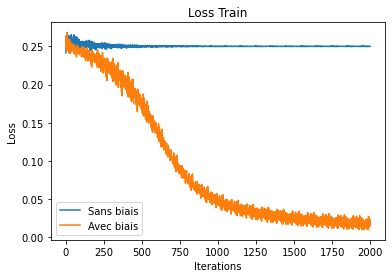

In [22]:
plt.figure()
plt.plot(losses_train_MBGDSansB)
plt.plot(losses_train_MBGDAvecB)
plt.legend(['Sans biais', 'Avec biais'])
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Train')
plt.show()

In [23]:
accuTrainSansB, yhat = accuracy_linear(seqNonLinearSansB, artix4_train, artiy4_train)
accuTrainAvecB, yhat = accuracy_linear(seqNonLinearAvecB, artix4_test, artiy4_test)

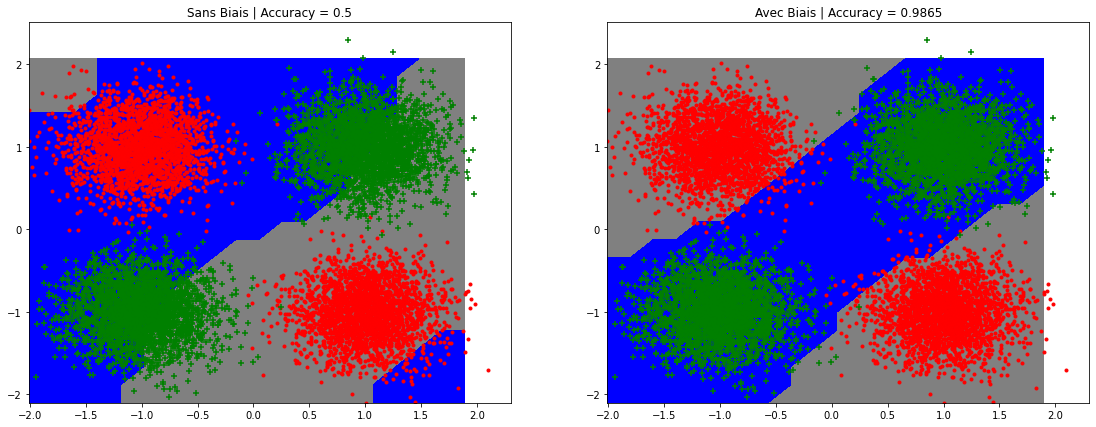

In [24]:
plt.figure(figsize=(19,7))
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plot_frontiere(artix4_train, predict_linear, seqNonLinearSansB)
plot_data(artix4_train, artiy4_train)
plt.title(f'Sans Biais | Accuracy = {accuTrainSansB}')
plt.subplot(1, 2, 2) # row 1, col 2 index 1
plot_frontiere(artix4_train, predict_linear, seqNonLinearAvecB)
plot_data(artix4_train, artiy4_train)
plt.title(f'Avec Biais | Accuracy = {accuTrainAvecB}')
plt.show()

On voit clairement ici l'interet d'avoir un biais.

Testons à présent un nombre de neurones différents

In [25]:
seqNonLinear2N = Sequential([Linear(len(artix4_train[0]),2, biais=True),TanH(),Linear(2,1, biais=True),Sigmoide()])
seqNonLinear4N = Sequential([Linear(len(artix4_train[0]),4, biais=True),TanH(),Linear(4,1, biais=True),Sigmoide()])
seqNonLinear5N = Sequential([Linear(len(artix4_train[0]),5, biais=True),TanH(),Linear(5,1, biais=True),Sigmoide()])
seqNonLinear10N = Sequential([Linear(len(artix4_train[0]),10, biais=True),TanH(),Linear(10,1, biais=True),Sigmoide()])
seqNonLinear20N = Sequential([Linear(len(artix4_train[0]),20, biais=True),TanH(),Linear(20,1, biais=True),Sigmoide()])

In [26]:
loss2N = BatchGD(seqNonLinear2N, mse, artix4_train, artiy4_train, epochs=15, eps=0.001)
loss4N = BatchGD(seqNonLinear4N, mse, artix4_train, artiy4_train, epochs=15, eps=0.001)
loss5N = BatchGD(seqNonLinear5N, mse, artix4_train, artiy4_train, epochs=15, eps=0.001)
loss10N = BatchGD(seqNonLinear10N, mse, artix4_train, artiy4_train, epochs=15, eps=0.001)
loss20N = BatchGD(seqNonLinear20N, mse, artix4_train, artiy4_train, epochs=15, eps=0.001)

100%|██████████| 15/15 [00:00<00:00, 66.24it/s]


In [27]:
acculoss2N, _ = accuracy_linear(seqNonLinear2N, artix4_test, artiy4_test)
acculoss4N, _ = accuracy_linear(seqNonLinear4N, artix4_test, artiy4_test)
acculoss5N, _ = accuracy_linear(seqNonLinear5N, artix4_test, artiy4_test)
acculoss10N,_ = accuracy_linear(seqNonLinear10N, artix4_test, artiy4_test)
acculoss20N,_ = accuracy_linear(seqNonLinear20N, artix4_test, artiy4_test)

#### Plot avec le dataset Test

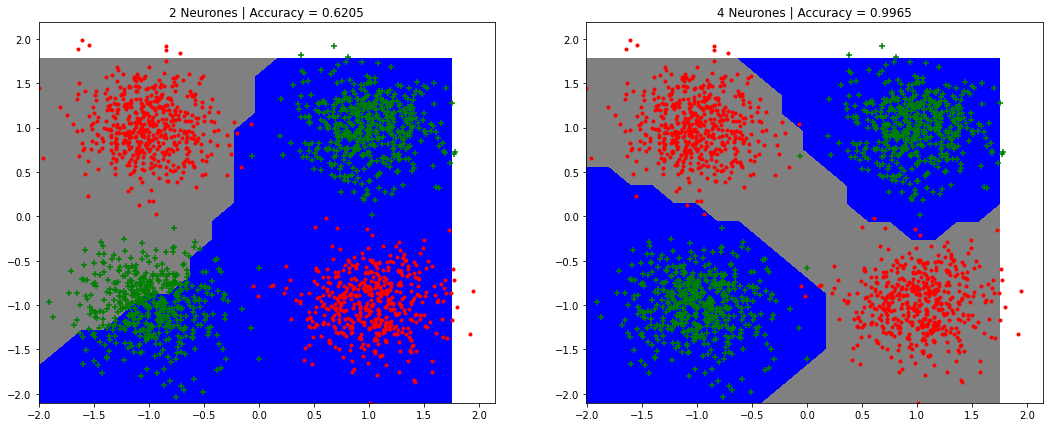

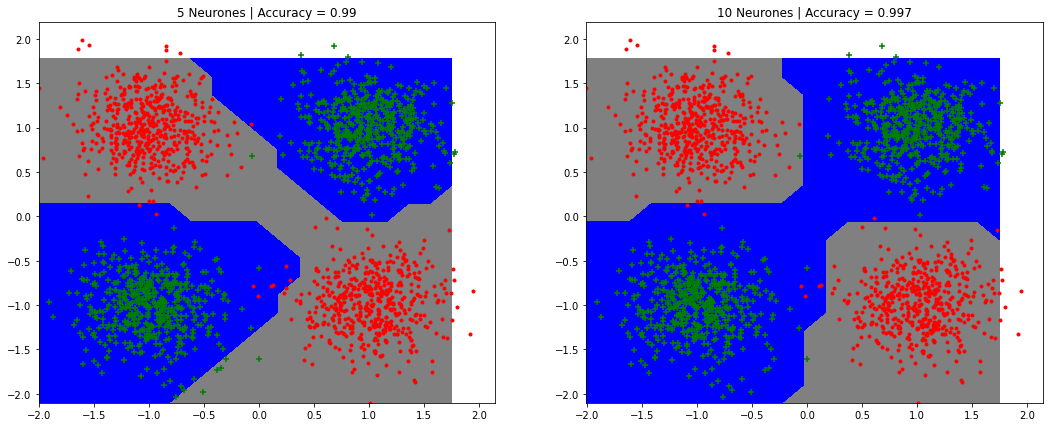

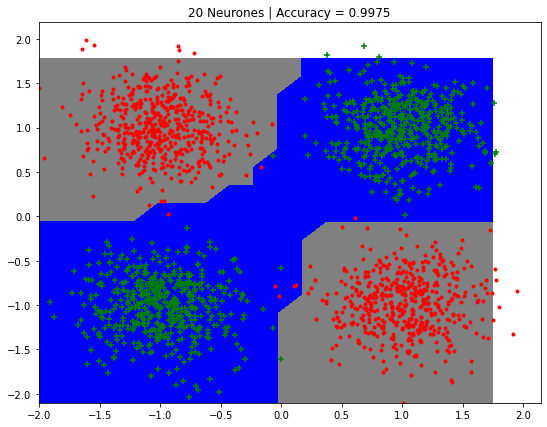

In [28]:
plt.figure(figsize=(18,7))
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plot_frontiere(artix4_test, predict_linear, seqNonLinear2N)
plot_data(artix4_test, artiy4_test)
plt.title(f'2 Neurones | Accuracy = {acculoss2N}')
plt.subplot(1, 2, 2) # row 1, col 2 index 1
plot_frontiere(artix4_test, predict_linear, seqNonLinear4N)
plot_data(artix4_test, artiy4_test)
plt.title(f'4 Neurones | Accuracy = {acculoss4N}')
plt.show()

plt.figure(figsize=(18,7))
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plot_frontiere(artix4_test, predict_linear, seqNonLinear5N)
plot_data(artix4_test, artiy4_test)
plt.title(f'5 Neurones | Accuracy = {acculoss5N}')
plt.subplot(1, 2, 2) # row 1, col 2 index 1
plot_frontiere(artix4_test, predict_linear, seqNonLinear10N)
plot_data(artix4_test, artiy4_test)
plt.title(f'10 Neurones | Accuracy = {acculoss10N}')
plt.show()

plt.figure(figsize=(9,7))
plot_frontiere(artix4_test, predict_linear, seqNonLinear20N)
plot_data(artix4_test, artiy4_test)
plt.title(f'20 Neurones | Accuracy = {acculoss20N}')
plt.show()

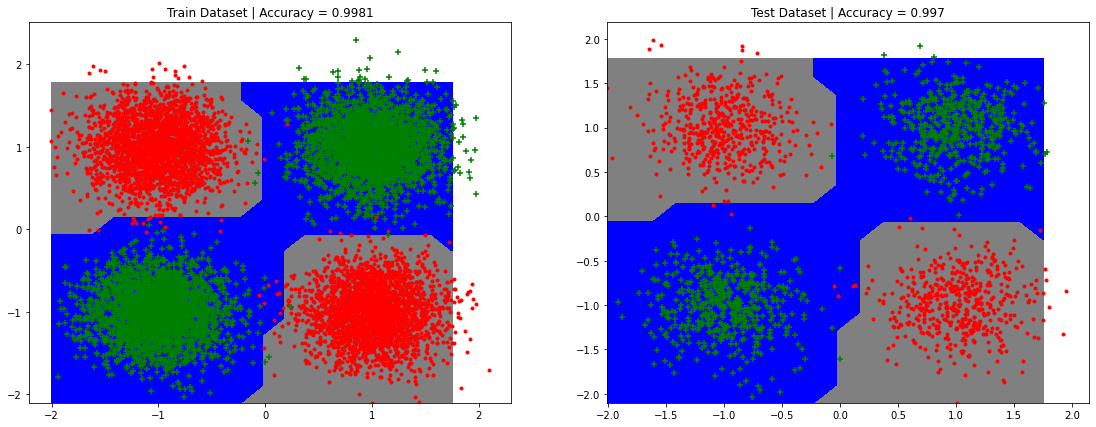

In [29]:
acculossTrain10N, yhat = accuracy_linear(seqNonLinear10N, artix4_train, artiy4_train)
acculossTest10N, yhat = accuracy_linear(seqNonLinear10N, artix4_test, artiy4_test)

plt.figure(figsize=(19,7))
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plot_frontiere(artix4_test, predict_linear, seqNonLinear10N)
plot_data(artix4_train, artiy4_train)
plt.title(f'Train Dataset | Accuracy = {acculossTrain10N}')
plt.subplot(1, 2, 2) # row 1, col 2 index 1
plot_frontiere(artix4_test, predict_linear, seqNonLinear10N)
plot_data(artix4_test, artiy4_test)
plt.title(f'Test Dataset | Accuracy = {acculossTest10N}')
plt.show()

# Multi-Classe

## MSE VS CrossEntropy

In [31]:
mse = MSELoss()
ce = CrossEntropyLogSoftmax()
dimensionX = len(mnist_train_X[0])
number_output = 10

In [32]:
mnist_train_y_OH = one_hot(mnist_train_y)
mnist_test_y_OH = one_hot(mnist_test_y)

### Nombres de neurones

#### 128N -> 64N -> 10N

##### Non normalisé

In [33]:
number_neurons_layer1 = 128
number_neurons_layer2 = 64

seqMSE1 = Sequential([Linear(dimensionX,number_neurons_layer1),TanH(),
                    Linear(number_neurons_layer1,number_neurons_layer2),TanH(),
                    Linear(number_neurons_layer2,number_output), Sigmoide()])

seqCE1 = Sequential([Linear(dimensionX,number_neurons_layer1),TanH(),
                    Linear(number_neurons_layer1,number_neurons_layer2),TanH(),
                    Linear(number_neurons_layer2,number_output)])

In [34]:
all_loss_MSE1 = MiniBatchGD(seqMSE1, mse, mnist_train_X, mnist_train_y_OH, 200, epochs=20, eps=10e-5)
all_loss_CE1 = MiniBatchGD(seqCE1, ce, mnist_train_X, mnist_train_y_OH, 200, epochs=20, eps=10e-5)

100%|██████████| 20/20 [00:41<00:00,  2.07s/it]


In [35]:
accu_MSE1 = accuracy_argmax(mnist_test_X, mnist_test_y_OH, seqMSE1)
accu_CE1 = accuracy_argmax(mnist_test_X, mnist_test_y_OH, seqCE1)

print(f'Accuracy MSE : {accu_MSE1}')
print(f'Accuracy CE : {accu_CE1}')

Accuracy MSE : 0.8444
Accuracy CE : 0.8806


##### Normalisé

In [40]:
number_neurons_layer1 = 128
number_neurons_layer2 = 64

seqMSE1 = Sequential([Linear(dimensionX,number_neurons_layer1),TanH(),
                    Linear(number_neurons_layer1,number_neurons_layer2),TanH(),
                    Linear(number_neurons_layer2,number_output), Sigmoide()])

seqCE1 = Sequential([Linear(dimensionX,number_neurons_layer1),TanH(),
                    Linear(number_neurons_layer1,number_neurons_layer2),TanH(),
                    Linear(number_neurons_layer2,number_output)])

In [41]:
all_loss_MSE1_norm = MiniBatchGD(seqMSE1, mse, mnist_train_X/255, mnist_train_y_OH, 200, epochs=20, eps=10e-5)
all_loss_CE1_norm = MiniBatchGD(seqCE1, ce, mnist_train_X/255, mnist_train_y_OH, 200, epochs=20, eps=10e-5)

100%|██████████| 20/20 [00:40<00:00,  2.02s/it]


In [42]:
accu_MSE1_norm = accuracy_argmax(mnist_test_X/255, mnist_test_y_OH, seqMSE1)
accu_CE1_norm = accuracy_argmax(mnist_test_X/255, mnist_test_y_OH, seqCE1)

print(f'Accuracy MSE : {accu_MSE1_norm}')
print(f'Accuracy CE : {accu_CE1_norm}')

Accuracy MSE : 0.8793
Accuracy CE : 0.9187


#### 256N -> 128N -> 10N

##### Non normalisé

In [43]:
number_neurons_layer1 = 256
number_neurons_layer2 = 128

seqMSE2 = Sequential([Linear(dimensionX,number_neurons_layer1),TanH(),
                    Linear(number_neurons_layer1,number_neurons_layer2),TanH(),
                    Linear(number_neurons_layer2,number_output), Sigmoide()])

seqCE2 = Sequential([Linear(dimensionX,number_neurons_layer1),TanH(),
                    Linear(number_neurons_layer1,number_neurons_layer2),TanH(),
                    Linear(number_neurons_layer2,number_output)])

In [44]:
all_loss_MSE2 = MiniBatchGD(seqMSE2, mse, mnist_train_X, mnist_train_y_OH, 200, epochs=20, eps=10e-5)
all_loss_CE2 = MiniBatchGD(seqCE2, ce, mnist_train_X, mnist_train_y_OH, 200, epochs=20, eps=10e-5)

100%|██████████| 20/20 [01:03<00:00,  3.18s/it]


In [45]:
accu_MSE2 = accuracy_argmax(mnist_test_X, mnist_test_y_OH, seqMSE2)
accu_CE2 = accuracy_argmax(mnist_test_X, mnist_test_y_OH, seqCE2)

print(f'Accuracy MSE : {accu_MSE2}')
print(f'Accuracy CE : {accu_CE2}')

Accuracy MSE : 0.8275
Accuracy CE : 0.8907


##### Normalisé

In [46]:
number_neurons_layer1 = 256
number_neurons_layer2 = 128

seqMSE2 = Sequential([Linear(dimensionX,number_neurons_layer1),TanH(),
                    Linear(number_neurons_layer1,number_neurons_layer2),TanH(),
                    Linear(number_neurons_layer2,number_output), Sigmoide()])

seqCE2 = Sequential([Linear(dimensionX,number_neurons_layer1),TanH(),
                    Linear(number_neurons_layer1,number_neurons_layer2),TanH(),
                    Linear(number_neurons_layer2,number_output)])

In [47]:
all_loss_MSE2_norm = MiniBatchGD(seqMSE2, mse, mnist_train_X/255, mnist_train_y_OH, 200, epochs=20, eps=10e-5)
all_loss_CE2_norm = MiniBatchGD(seqCE2, ce, mnist_train_X/255, mnist_train_y_OH, 200, epochs=20, eps=10e-5)

 80%|████████  | 16/20 [01:00<00:15,  3.81s/it]


KeyboardInterrupt: 

In [ ]:
accu_MSE2_norm = accuracy_argmax(mnist_test_X/255, mnist_test_y_OH, seqMSE2)
accu_CE2_norm = accuracy_argmax(mnist_test_X/255, mnist_test_y_OH, seqCE2)

print(f'Accuracy MSE : {accu_MSE2_norm}')
print(f'Accuracy CE : {accu_CE2_norm}')

Accuracy MSE : 0.8876
Accuracy CE : 0.9212


#### 512N -> 256N -> 10N

##### Non normalisé

In [ ]:
number_neurons_layer1 = 512
number_neurons_layer2 = 256

seqMSE3 = Sequential([Linear(dimensionX,number_neurons_layer1),TanH(),
                    Linear(number_neurons_layer1,number_neurons_layer2),TanH(),
                    Linear(number_neurons_layer2,number_output), Sigmoide()])

seqCE3 = Sequential([Linear(dimensionX,number_neurons_layer1),TanH(),
                    Linear(number_neurons_layer1,number_neurons_layer2),TanH(),
                    Linear(number_neurons_layer2,number_output)])

In [ ]:
all_loss_MSE3 = MiniBatchGD(seqMSE3, mse, mnist_train_X, mnist_train_y_OH, 200, epochs=20, eps=10e-5)
all_loss_CE3 = MiniBatchGD(seqCE3, ce, mnist_train_X, mnist_train_y_OH, 200, epochs=20, eps=10e-5)

100%|██████████| 20/20 [02:02<00:00,  6.10s/it]


In [ ]:
accu_MSE3 = accuracy_argmax(mnist_test_X, mnist_test_y_OH, seqMSE3)
accu_CE3 = accuracy_argmax(mnist_test_X, mnist_test_y_OH, seqCE3)

print(f'Accuracy MSE : {accu_MSE3}')
print(f'Accuracy CE : {accu_CE3}')

Accuracy MSE : 0.8375
Accuracy CE : 0.8917


##### Normalisé

In [39]:
number_neurons_layer1 = 512
number_neurons_layer2 = 256

seqMSE3 = Sequential([Linear(dimensionX,number_neurons_layer1),TanH(),
                    Linear(number_neurons_layer1,number_neurons_layer2),TanH(),
                    Linear(number_neurons_layer2,number_output), Sigmoide()])

seqCE3 = Sequential([Linear(dimensionX,number_neurons_layer1),TanH(),
                    Linear(number_neurons_layer1,number_neurons_layer2),TanH(),
                    Linear(number_neurons_layer2,number_output)])

In [40]:
all_loss_MSE3_norm = MiniBatchGD(seqMSE3, mse, mnist_train_X/255, mnist_train_y_OH, 200, epochs=20, eps=10e-5)
all_loss_CE3_norm = MiniBatchGD(seqCE3, ce, mnist_train_X/255, mnist_train_y_OH, 200, epochs=20, eps=10e-5)

100%|██████████| 20/20 [02:20<00:00,  7.01s/it]


In [41]:
accu_MSE3_norm = accuracy_argmax(mnist_test_X/255, mnist_test_y_OH, seqMSE3)
accu_CE3_norm = accuracy_argmax(mnist_test_X/255, mnist_test_y_OH, seqCE3)

print(f'Accuracy MSE : {accu_MSE3_norm}')
print(f'Accuracy CE : {accu_CE3_norm}')

Accuracy MSE : 0.8059
Accuracy CE : 0.9153


### Comparaison

In [280]:
d = {'Non normalise' : [accu_MSE1, accu_CE1, accu_MSE2, accu_CE2, accu_MSE3, accu_CE3], 'Normalise' : [accu_MSE1_norm, accu_CE1_norm, accu_MSE2_norm, accu_CE2_norm, accu_MSE3_norm, accu_CE3_norm]}

errors = 1 - pd.DataFrame(data=d, index=['MSE 128/64', 'CE 128/64', 'MSE 256/128', 'CE 256/128', 'MSE 512/256', 'CE 512/256'])

In [281]:
errors

,Non normalise,Normalise
MSE 128/64,0.1313,0.1229
CE 128/64,0.1190,0.0844
MSE 256/128,0.1520,0.1124
CE 256/128,0.1081,0.0788
MSE 512/256,0.1625,0.0914
CE 512/256,0.1083,0.0783


On s'apercoit ici que normaliser permet d'avoir un gain bien plus important. On s'en doutait evidemment mais il est interessant de voir son impact 

In [289]:
diff = errors['Non normalise'] - errors['Normalise']
print(diff.values.mean())
diff

0.035499999999999955


MSE 128/64     0.0084
CE 128/64      0.0346
MSE 256/128    0.0396
CE 256/128     0.0293
MSE 512/256    0.0711
CE 512/256     0.0300
dtype: float64

On constate que son impact est énorme avec environ 3% de plus en accuracy en moyenne. Surtout pour le MSE 512/256 avec plus de 7% !

In [304]:
mse_values = errors.iloc[[0, 2, 4]]
ce_values = errors.iloc[[1, 3, 5]]

diff_loss = ce_values.sub(mse_values, axis='index')
mse_values - ce_values

,Non normalise,Normalise
CE 128/64,NaN,NaN
CE 256/128,NaN,NaN
CE 512/256,NaN,NaN
MSE 128/64,NaN,NaN
MSE 256/128,NaN,NaN
MSE 512/256,NaN,NaN


A présent essayons de voir si le nombre de couche permet d'avoir de meilleur résultat. Nous allons utiliser pour cela la base de 512 neurones pour la 1ere couche, 256 neurones pour la 2ème et on va en ajouter petits à petits pour voir les différences.

### Nombre de couche

#### 2 couches

In [42]:
number_neurons_layer1 = 512
number_neurons_layer2 = 256

seqMSE2C = Sequential([Linear(dimensionX,number_neurons_layer1),TanH(),
                    Linear(number_neurons_layer1,number_neurons_layer2),TanH(),
                    Linear(number_neurons_layer2,number_output), Sigmoide()])

seqCE2C = Sequential([Linear(dimensionX,number_neurons_layer1),TanH(),
                    Linear(number_neurons_layer1,number_neurons_layer2),TanH(),
                    Linear(number_neurons_layer2,number_output)])

In [43]:
all_loss_MSE2C = MiniBatchGD(seqMSE2C, mse, mnist_train_X/255, mnist_train_y_OH, 200, epochs=20, eps=10e-5)
all_loss_CE2C = MiniBatchGD(seqCE2C, ce, mnist_train_X/255, mnist_train_y_OH, 200, epochs=20, eps=10e-5)

100%|██████████| 20/20 [02:34<00:00,  7.74s/it]


In [44]:
accu_MSE2C = accuracy_argmax(mnist_test_X/255, mnist_test_y_OH, seqMSE2C)
accu_CE2C = accuracy_argmax(mnist_test_X/255, mnist_test_y_OH, seqCE2C)

print(f'Accuracy MSE : {accu_MSE2C}')
print(f'Accuracy CE : {accu_CE2C}')

Accuracy MSE : 0.8723
Accuracy CE : 0.9152


#### 3 couches

In [50]:
number_neurons_layer1 = 512
number_neurons_layer2 = 256
number_neurons_layer3 = 128

seqMSE3C = Sequential([Linear(dimensionX,number_neurons_layer1),TanH(),
                    Linear(number_neurons_layer1,number_neurons_layer2),TanH(),
                    Linear(number_neurons_layer2,number_neurons_layer3),TanH(),
                    Linear(number_neurons_layer3,number_output), Sigmoide()])

seqCE3C = Sequential([Linear(dimensionX,number_neurons_layer1),TanH(),
                    Linear(number_neurons_layer1,number_neurons_layer2),TanH(),
                    Linear(number_neurons_layer2,number_neurons_layer3),TanH(),
                    Linear(number_neurons_layer3,number_output)])

In [51]:
all_loss_MSE3C = MiniBatchGD(seqMSE3C, mse, mnist_train_X/255, mnist_train_y_OH, 200, epochs=20, eps=10e-5)
all_loss_CE3C = MiniBatchGD(seqCE3C, ce, mnist_train_X/255, mnist_train_y_OH, 200, epochs=20, eps=10e-5)

100%|██████████| 20/20 [02:24<00:00,  7.22s/it]


In [52]:
accu_MSE3C = accuracy_argmax(mnist_test_X/255, mnist_test_y_OH, seqMSE3C)
accu_CE3C = accuracy_argmax(mnist_test_X/255, mnist_test_y_OH, seqCE3C)

print(f'Accuracy MSE : {accu_MSE3C}')
print(f'Accuracy CE : {accu_CE3C}')

Accuracy MSE : 0.8649
Accuracy CE : 0.9038


#### 4 couches

In [47]:
number_neurons_layer1 = 512
number_neurons_layer2 = 256
number_neurons_layer3 = 128
number_neurons_layer4 = 64

seqMSE4C = Sequential([Linear(dimensionX,number_neurons_layer1),TanH(),
                    Linear(number_neurons_layer1,number_neurons_layer2),TanH(),
                    Linear(number_neurons_layer2,number_neurons_layer3),TanH(),
                    Linear(number_neurons_layer3,number_neurons_layer4),TanH(),
                    Linear(number_neurons_layer4,number_output), Sigmoide()])

seqCE4C = Sequential([Linear(dimensionX,number_neurons_layer1),TanH(),
                    Linear(number_neurons_layer1,number_neurons_layer2),TanH(),
                    Linear(number_neurons_layer2,number_neurons_layer3),TanH(),
                    Linear(number_neurons_layer3,number_neurons_layer4),TanH(),
                    Linear(number_neurons_layer4,number_output)])

In [48]:
all_loss_MSE4C = MiniBatchGD(seqMSE4C, mse, mnist_train_X/255, mnist_train_y_OH, 200, epochs=20, eps=10e-5)
all_loss_CE4C = MiniBatchGD(seqCE4C, ce, mnist_train_X/255, mnist_train_y_OH, 200, epochs=20, eps=10e-5)

100%|██████████| 20/20 [02:39<00:00,  7.97s/it]


In [49]:
accu_MSE4C = accuracy_argmax(mnist_test_X/255, mnist_test_y_OH, seqMSE4C)
accu_CE4C = accuracy_argmax(mnist_test_X/255, mnist_test_y_OH, seqCE4C)

print(f'Accuracy MSE : {accu_MSE4C}')
print(f'Accuracy CE : {accu_CE4C}')

Accuracy MSE : 0.8649
Accuracy CE : 0.8898


### Comparaison

In [53]:
d = {'MSE' : [accu_MSE2C, accu_MSE3C, accu_MSE4C], 'CE' : [accu_CE2C, accu_CE3C, accu_CE4C]}

errors = 1 - pd.DataFrame(data=d, index=['2C', '3C', '4C'])

In [55]:
errors

,MSE,CE
2C,0.1277,0.0848
3C,0.1351,0.0962
4C,0.1351,0.1102


On constate ici qu'avoir 2 couches nous permet d'avoir les meilleurs résultats et comme avant on s'apercoit clairement de la différence entre la MSE et la CE 

In [67]:
y_pred = np.argmax(seqCE2C.forward(mnist_test_X/255), axis=1)
cf_matrix = confusion_matrix(mnist_test_y, y_pred)

# Encodeur

### Neural Networks

### Nombres de neurones

#### 100N

In [57]:
dimensionX = len(X_train_usps[0])
number_neurons_layer1 = 100
number_neurons_layer2 = 10

seqEncoder100 = [Linear(dimensionX, number_neurons_layer1), TanH(), Linear(number_neurons_layer1, number_neurons_layer2), TanH()]
seqDecoder100 = [Linear(number_neurons_layer2, number_neurons_layer1), TanH(), Linear(number_neurons_layer1, dimensionX), Sigmoide()]

net100 = Sequential(seqEncoder100 + seqDecoder100)
ce = BinaryCrossEntropy()

### Test

In [58]:
all_loss = MiniBatchGD(net100, ce, X_train_usps/2, X_train_usps/2, 1000, epochs=1000, eps=10e-5, verbose=False)

100%|██████████| 1000/1000 [05:53<00:00,  2.83it/s]


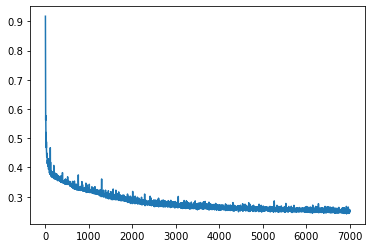

In [59]:
plt.figure()
plt.plot(all_loss)
plt.show()

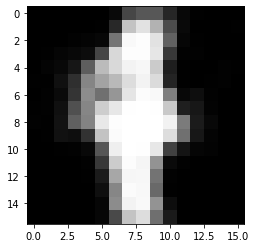

In [65]:
show_usps(net100.forward(X_train_usps[20]))

#### 200N

In [17]:
dimensionX = len(X_train_usps[0])
number_neurons_layer1 = 200
number_neurons_layer2 = 10

seqEncoder100R = [Linear(dimensionX, number_neurons_layer1), TanH(), Linear(number_neurons_layer1, number_neurons_layer2), TanH()]
seqDecoder100R = [Linear(number_neurons_layer2, number_neurons_layer1), TanH(), Linear(number_neurons_layer1, dimensionX), Sigmoide()]

net100R = Sequential(seqEncoder100R + seqDecoder100R)
ce = BinaryCrossEntropy()

In [18]:
all_loss = MiniBatchGD(net100R, ce, X_train_usps/2, X_train_usps/2, 1000, epochs=1000, eps=10e-5, verbose=False)

100%|██████████| 1000/1000 [08:19<00:00,  2.00it/s]


In [31]:
first_ind_test = []
first_ind_test.append((np.where(Y_train_usps == 0)[0][10]))
first_ind_test.append((np.where(Y_train_usps == 1)[0][10]))
first_ind_test.append((np.where(Y_train_usps == 2)[0][10]))
first_ind_test.append((np.where(Y_train_usps == 3)[0][10]))
first_ind_test.append((np.where(Y_train_usps == 4)[0][10]))
first_ind_test.append((np.where(Y_train_usps == 5)[0][10]))
first_ind_test.append((np.where(Y_train_usps == 6)[0][10]))
first_ind_test.append((np.where(Y_train_usps == 7)[0][10]))
first_ind_test.append((np.where(Y_train_usps == 8)[0][10]))
first_ind_test.append((np.where(Y_train_usps == 9)[0][10]))

In [32]:
first_ind_test

[63, 34, 71, 51, 38, 211, 89, 27, 69, 120]

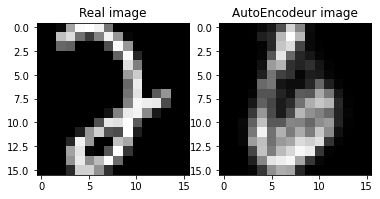

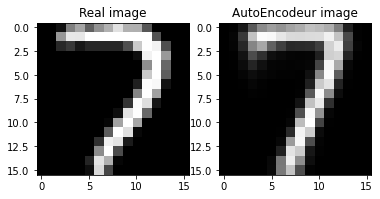

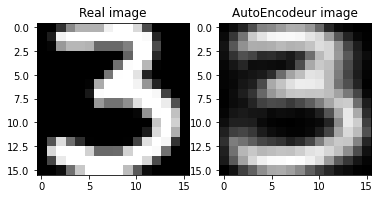

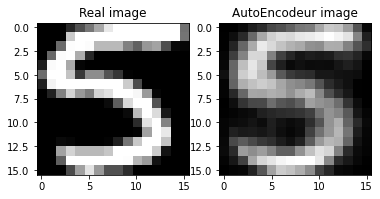

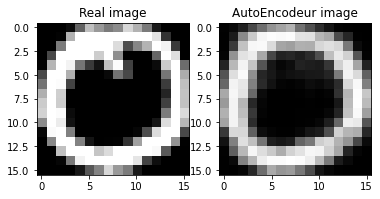

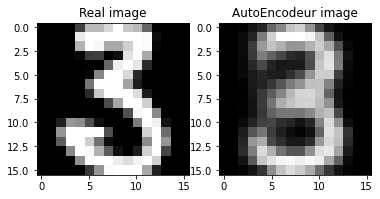

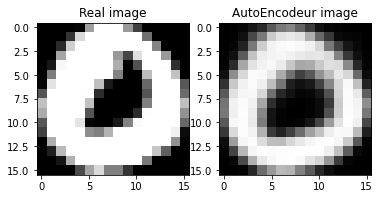

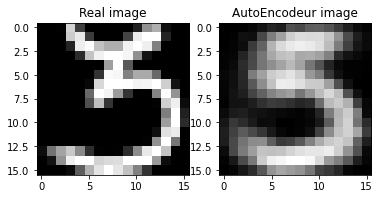

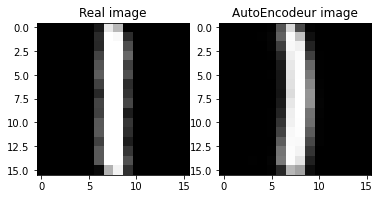

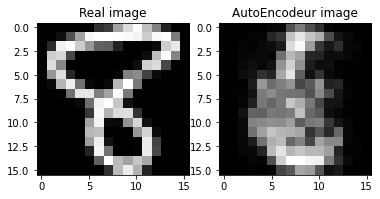

In [33]:
show_usps_compare(X_test_usps[first_ind_test[0]], net100R.forward(X_test_usps[first_ind_test[0]]))
show_usps_compare(X_test_usps[first_ind_test[1]], net100R.forward(X_test_usps[first_ind_test[1]]))
show_usps_compare(X_test_usps[first_ind_test[2]], net100R.forward(X_test_usps[first_ind_test[2]]))
show_usps_compare(X_test_usps[first_ind_test[3]], net100R.forward(X_test_usps[first_ind_test[3]]))
show_usps_compare(X_test_usps[first_ind_test[4]], net100R.forward(X_test_usps[first_ind_test[4]]))
show_usps_compare(X_test_usps[first_ind_test[5]], net100R.forward(X_test_usps[first_ind_test[5]]))
show_usps_compare(X_test_usps[first_ind_test[6]], net100R.forward(X_test_usps[first_ind_test[6]]))
show_usps_compare(X_test_usps[first_ind_test[7]], net100R.forward(X_test_usps[first_ind_test[7]]))
show_usps_compare(X_test_usps[first_ind_test[8]], net100R.forward(X_test_usps[first_ind_test[8]]))
show_usps_compare(X_test_usps[first_ind_test[9]], net100R.forward(X_test_usps[first_ind_test[9]]))

In [43]:
dimensionX = len(X_train_usps[0])
number_neurons_layer1 = 300
number_neurons_layer2 = 10

seqEncoder300 = [Linear(dimensionX, number_neurons_layer1), TanH(), Linear(number_neurons_layer1, number_neurons_layer2), TanH()]
seqDecoder300 = [Linear(number_neurons_layer2, number_neurons_layer1), TanH(), Linear(number_neurons_layer1, dimensionX), Sigmoide()]

net300 = Sequential(seqEncoder300 + seqDecoder300)
ce = BinaryCrossEntropy()

In [44]:
all_loss = BatchGD(net300, ce, X_train_usps/2., X_train_usps/2., epochs=1000, eps=10e-6, verbose=False)

100%|██████████| 1000/1000 [11:42<00:00,  1.42it/s]


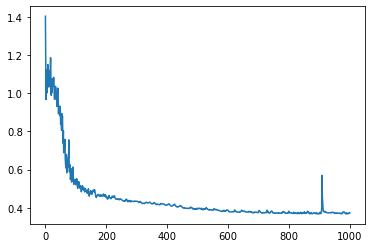

In [45]:
plt.figure()
plt.plot(all_loss)
plt.show()

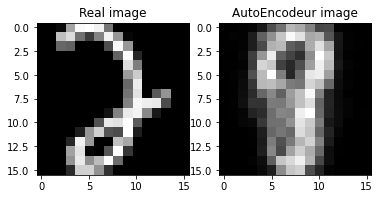

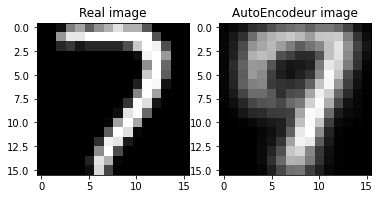

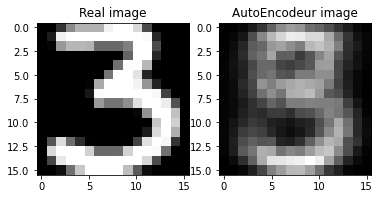

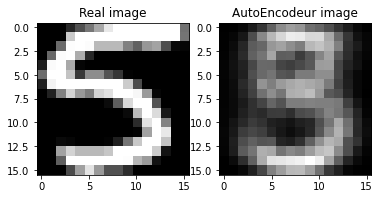

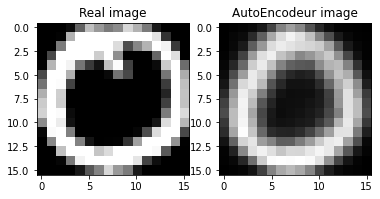

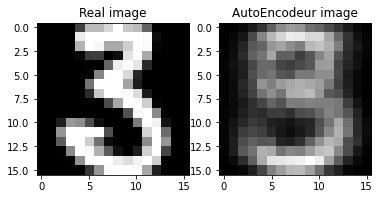

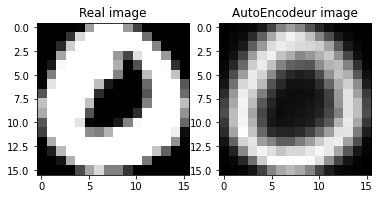

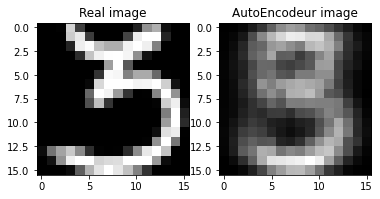

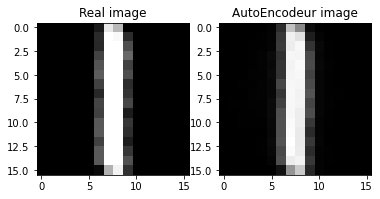

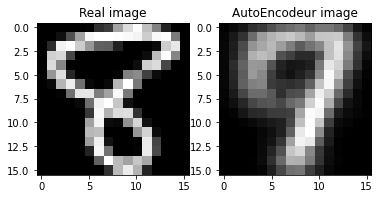

In [46]:
show_usps_compare(X_test_usps[first_ind_test[0]], net300.forward(X_test_usps[first_ind_test[0]]))
show_usps_compare(X_test_usps[first_ind_test[1]], net300.forward(X_test_usps[first_ind_test[1]]))
show_usps_compare(X_test_usps[first_ind_test[2]], net300.forward(X_test_usps[first_ind_test[2]]))
show_usps_compare(X_test_usps[first_ind_test[3]], net300.forward(X_test_usps[first_ind_test[3]]))
show_usps_compare(X_test_usps[first_ind_test[4]], net300.forward(X_test_usps[first_ind_test[4]]))
show_usps_compare(X_test_usps[first_ind_test[5]], net300.forward(X_test_usps[first_ind_test[5]]))
show_usps_compare(X_test_usps[first_ind_test[6]], net300.forward(X_test_usps[first_ind_test[6]]))
show_usps_compare(X_test_usps[first_ind_test[7]], net300.forward(X_test_usps[first_ind_test[7]]))
show_usps_compare(X_test_usps[first_ind_test[8]], net300.forward(X_test_usps[first_ind_test[8]]))
show_usps_compare(X_test_usps[first_ind_test[9]], net300.forward(X_test_usps[first_ind_test[9]]))

### t-SNE - Visualisation

#### Données de base

c:\Users\santh\anaconda3\envs\ml3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\santh\anaconda3\envs\ml3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


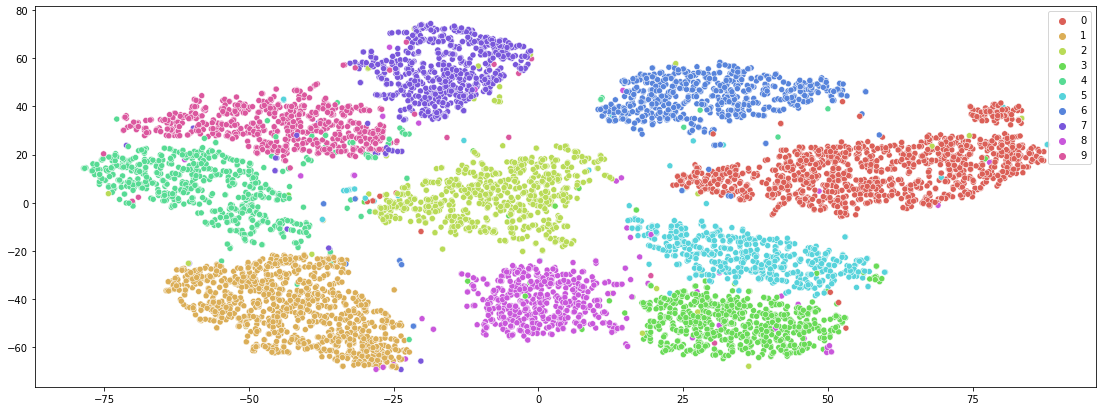

In [10]:
tsne = TSNE(n_components = 2, random_state=0)
tsne_res = tsne.fit_transform(X_train_usps)

plt.figure(figsize=(19,7))
sns.scatterplot(x = tsne_res[:,0], y = tsne_res[:,1], hue = Y_train_usps, palette = sns.hls_palette(10), legend = 'full')
plt.show()

### Données avec 10 dimensions 

In [ ]:
tsne = TSNE(n_components = 2, random_state=0)
tsne_res = tsne.fit_transform(mnist_test_X)

plt.figure(figsize=(19,7))
sns.scatterplot(x = tsne_res[:,0], y = tsne_res[:,1], hue = mnist_test_y, palette = sns.hls_palette(10), legend = 'full')
plt.show()

### Données avec 2 dimensions 

# Convolution

In [8]:
conv1D = Conv1D(3,1,32,1)
maxpool = MaxPool1D(2,2)
f = Flatten()
linear = Linear(4064, 100)
r = ReLu()
linear2 = Linear(100, 10)
mse = MSELoss()

X_train_usps_reshape = np.array(X_train_usps.reshape(len(X_train_usps), -1, 1))

print(X_train_usps_reshape.shape)
seq = Sequential([conv1D, maxpool, f, linear, r, linear2])
ce = CrossEntropyLogSoftmax()

(7291, 256, 1)


In [ ]:
epochs = 10
eps = 10e-5

all_loss = BatchGD(seq, ce, X_train_usps_reshape, Y_train_usps, epochs=epochs, eps=eps, verbose=False)
yhat = seq.forward(np.array([X_train_usps_reshape]))